<a href="https://colab.research.google.com/github/mittshah2/DCGAN/blob/master/GAN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as p
import os

In [0]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train = x_train/255
x_train = x_train.reshape(-1, 28, 28, 1) * 2. - 1.

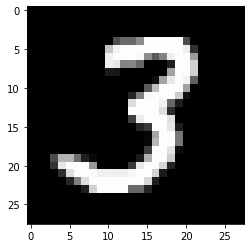

In [85]:
p.imshow(x_train[235].reshape(28,28),cmap='gray')

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Dropout,LeakyReLU,Flatten,BatchNormalization,Conv2D,Conv2DTranspose
from tensorflow.keras.models import Sequential
np.random.seed(42)
tf.random.set_seed(42)

coding_size = 100

In [87]:
discriminator = Sequential(name='discriminator')
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3),
                        input_shape=[28, 28, 1]))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1024, activation="relu"))
discriminator.add(Dense(512, activation="relu"))
discriminator.add(Dense(64, activation="relu"))
discriminator.add(Dense(1, activation="sigmoid"))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 14, 14, 64)        1664      
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 128)         204928    
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 1024)              6423552   
_________________________________________________________________
dense_31 (Dense)             (None, 512)             

In [88]:
generator = Sequential(name='generator')
generator.add(Dense(7 * 7 * 128, input_shape=[coding_size]))
generator.add(Reshape([7, 7, 128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                 activation="tanh"))
generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 6272)              633472    
_________________________________________________________________
reshape_6 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_13 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 28, 28, 1)         1601      
Total params: 840,705
Trainable params: 840,321
Non-trainable params: 384
_________________________________________________

In [0]:
GAN=Sequential([generator,discriminator])

discriminator.trainable=False

In [90]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')
GAN.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator (Sequential)       (None, 28, 28, 1)         840705    
_________________________________________________________________
discriminator (Sequential)   (None, 1)                 7187841   
Total params: 8,028,546
Trainable params: 840,321
Non-trainable params: 7,188,225
_________________________________________________________________


In [0]:
import tensorflow as tf
dataset=tf.data.Dataset.from_tensor_slices(x_train).shuffle(buffer_size=1000)

In [0]:
batch_size=32
dataset=dataset.batch(batch_size,drop_remainder=True)

In [93]:
GAN.layers

In [0]:
epochs=100

In [95]:
loss=[]
for epoch in range(epochs):
  i=0
  print('currently on epoch',epoch+1)
  for x_batch in dataset:
    i=i+1
    if(i%100==0):
      print('\tcurrently on batch',i)
    
    #discriminator
    noise=tf.random.normal(shape=[batch_size,coding_size])
    gen_images = generator(noise)

    x_fake_vs_real=tf.concat([gen_images,tf.dtypes.cast(x_batch,tf.float32)],axis=0)

    y1=tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size)

    discriminator.trainable=True

    discriminator.train_on_batch(x_fake_vs_real,y1)

    #train generator
    noise=tf.random.normal(shape=[batch_size,coding_size])
    y2=tf.constant([[1.0]]*batch_size)
    discriminator.trainable=False
    l=GAN.train_on_batch(noise,y2)
  print('The loss after',epoch,'is',l)
  loss.append(l)

currently on epoch 1
	currently on batch 100
	currently on batch 200
	currently on batch 300
	currently on batch 400
	currently on batch 500
	currently on batch 600
	currently on batch 700
	currently on batch 800
	currently on batch 900
	currently on batch 1000
	currently on batch 1100
	currently on batch 1200
	currently on batch 1300
	currently on batch 1400
	currently on batch 1500
	currently on batch 1600
	currently on batch 1700
	currently on batch 1800
The loss after 0 is 2.0101675987243652
currently on epoch 2
	currently on batch 100
	currently on batch 200
	currently on batch 300
	currently on batch 400
	currently on batch 500
	currently on batch 600
	currently on batch 700
	currently on batch 800
	currently on batch 900
	currently on batch 1000
	currently on batch 1100
	currently on batch 1200
	currently on batch 1300
	currently on batch 1400
	currently on batch 1500
	currently on batch 1600
	currently on batch 1700
	currently on batch 1800
The loss after 1 is 2.423257827758789

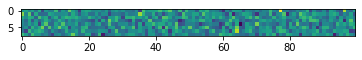

In [114]:
noise=tf.random.normal(shape=[8,coding_size])
p.imshow(noise)

In [0]:
images=generator(noise)

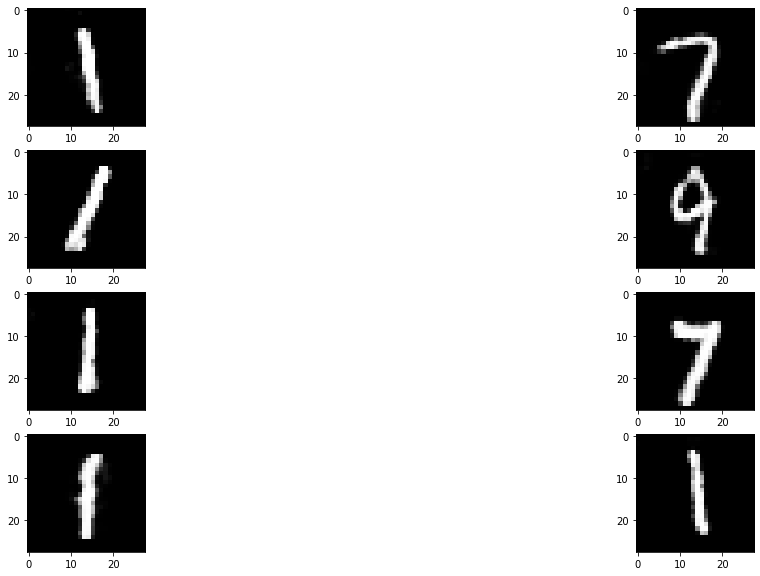

In [116]:
p.figure(figsize=(20,10))
for i in range(8):
  p.subplot(4,2,i+1)
  p.imshow(images[i].numpy().reshape(28,28),cmap='gray')